# Telecommunication Customer ChurnProblem.

### Business objective: 
The business objective of this data is to execute the necessary ML algorithms and predict the final model, 
considering the target variable as Churn, which here implies whether the customer is profitable or 
loss making to the company indicated by 1 and 0, based on the independent variables which express customer information regarding their telecommunication service details with the company, such that necessary initiatives can be taken upon profitable customers based on significant variables.

### About the dataset: 

This dataset is on a Telecommunication company which includes the customer information regarding their decisions registered against the various telecommunication services registered with the company.
Variable description: 

### Total variables: 
Gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges. The variables are in themselves self-explanatory by nature in context to the business problem.
Target variable: Churn.

### Deliverables: 
Perceive the business problem and solve it by predicting the best fitted model, using the necessary ML algorithms and submit the .ipynb files for marking.


## Exploring the data

In [248]:
# Reading the dataset
import pandas as pd
import numpy as np
TCC=pd.read_csv('C:/Users/Administrator/Desktop/Kaggle/Telecommunication_Customer_Churn.csv', encoding='latin')
print('Shape before deleting duplicate values:', TCC.shape)

# Removing duplicate rows if any
TCC=TCC.drop_duplicates()
print('Shape After deleting duplicate values:', TCC.shape)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
TCC.head(10)

Shape before deleting duplicate values: (7043, 20)
Shape After deleting duplicate values: (7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,151.65
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,820.50
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,0,1949.40
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,0,301.90
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1,3046.05
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,0,3487.95


In [249]:
# Looking at the number of rows and columns
TCC.shape

(7021, 20)

In [250]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
TCC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [251]:
TCC.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
TotalCharges        6531
dtype: int64

## Missing Values Treatment

In [252]:
TCC.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
TotalCharges        0
dtype: int64

NO missing Value in data, so no treatment is required.

In [253]:
# Printing the column names 
TCC.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'TotalCharges'],
      dtype='object')

## Removing useless variables from data

In [254]:
# Data Pre Processing
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['PaymentMethod']
TCC = TCC.drop(UselessColumns,axis=1)
TCC.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,Churn,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,0,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,0,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,1,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,0,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,1,151.65


## Observe the distribution of target variable

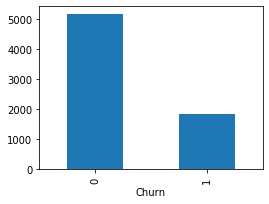

In [255]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=TCC.groupby('Churn').size()
GroupedData.plot(kind='bar', figsize=(4,3))

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots

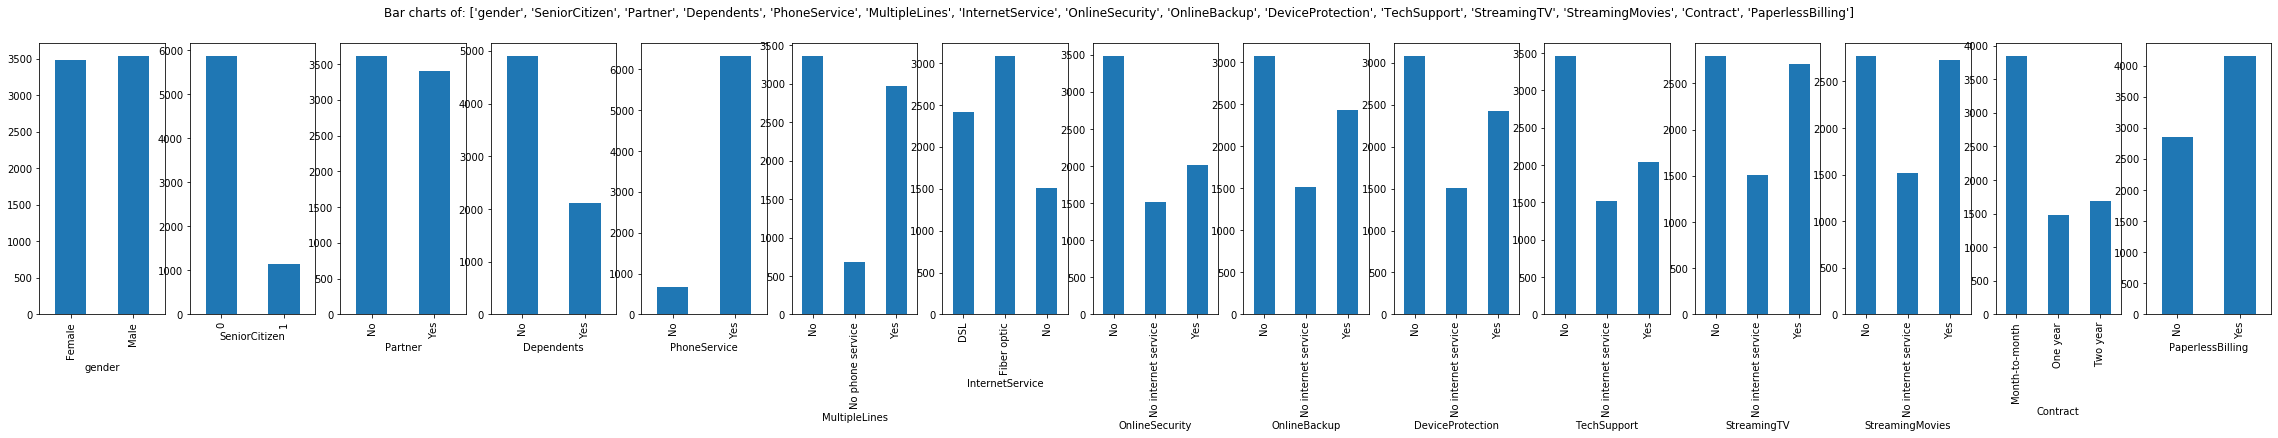

In [256]:
# Plotting multiple bar charts for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#######################
# Calling the function
PlotBarCharts(inpData=TCC, colsToPlot=['gender', 'SeniorCitizen', 'Partner','Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling'])

## Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002702A2C3B88>,
      dtype=object)

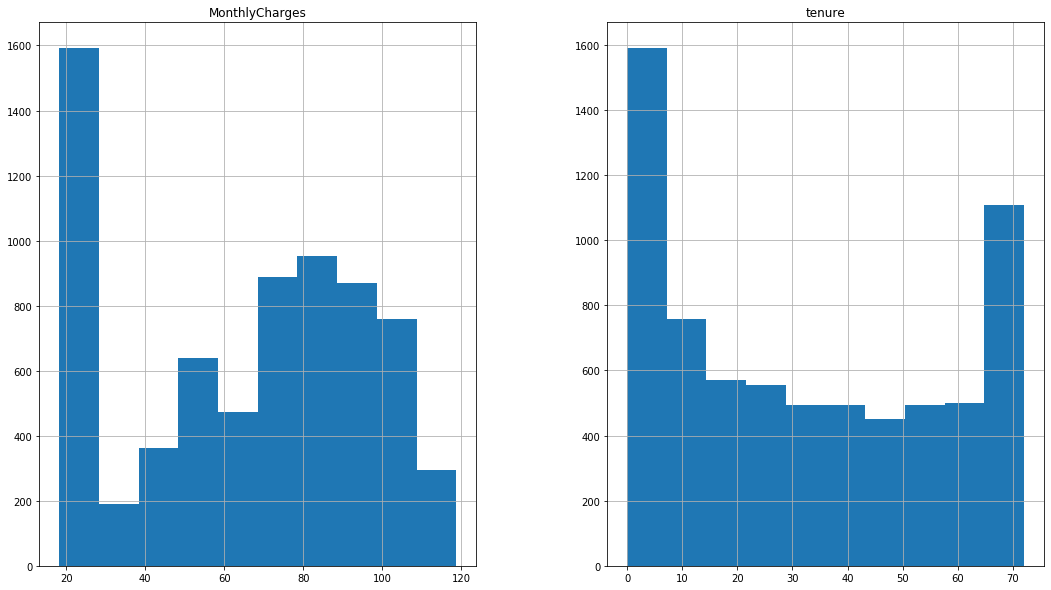

In [257]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
TCC.hist(['tenure','TotalCharges','MonthlyCharges'], figsize=(18,10))

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Bar Plot, Box Plot
* Categorical Vs Categorical---- Bar Plot

### Relationship exploration: Categorical Vs Continuous

In [258]:
# Grouping by Categorical variable Survived to find the aggregated values
GroupedData=TCC.groupby(['Churn'])

# Printing the aggregated values
GroupedData.mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
0,0.128970,37.640782,61.344878
1,0.255789,18.088853,74.604308


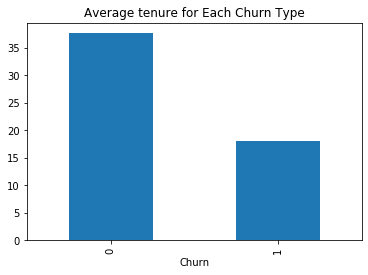

In [259]:
# Creating the graph with Price
# You can observice that many people who survived has paid higher fares!
GroupedData.mean()['tenure'].plot(kind='bar', title='Average tenure for Each Churn Type')

#### Looking at the variances by Box plot

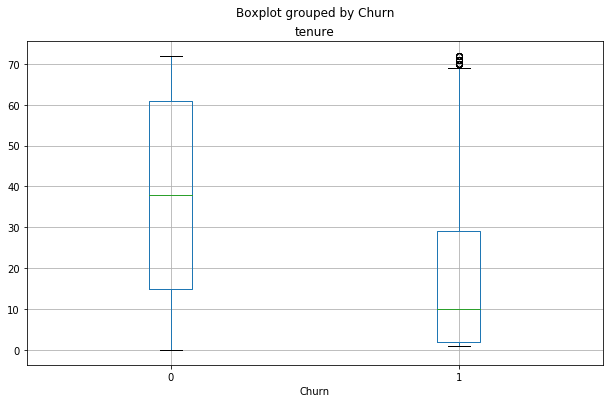

In [260]:
# Box plot for Categorical Variable Survived Vs Continuous Variable Fare
# Observe the outlier in Fare for Survived=1
TCC.boxplot(column='tenure', by='Churn', figsize=(10,6), vert=True)

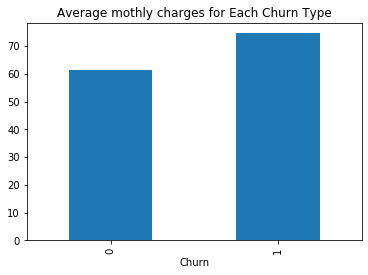

In [261]:
# Creating the graph with Price
# You can observice that many people who survived has paid higher fares!
GroupedData.mean()['MonthlyCharges'].plot(kind='bar', title='Average mothly charges for Each Churn Type')

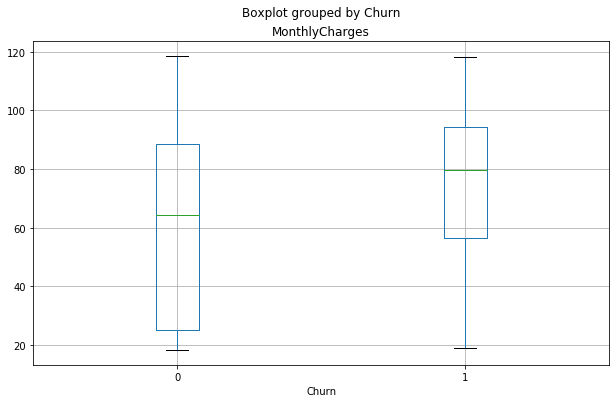

In [262]:
# Box plot for Categorical Variable Survived Vs Continuous Variable Fare
# Observe the outlier in Fare for Survived=1
TCC.boxplot(column='MonthlyCharges', by='Churn', figsize=(10,6), vert=True)

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [263]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [264]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['tenure','MonthlyCharges']
FunctionAnova(inpData=TCC, TargetVariable='Churn', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

tenure is correlated with Churn | P-Value: 2.6280951730468055e-203
MonthlyCharges is correlated with Churn | P-Value: 8.041921866085037e-61


['tenure', 'MonthlyCharges']

Tenure and Monthly charges are correlated with target variable

In [265]:
TCC.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'Churn', 'TotalCharges'],
      dtype='object')

## Relationship exploration: Categorical Vs Categorical

In [266]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['gender'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
gender,,
Female,2546,934
Male,2618,923


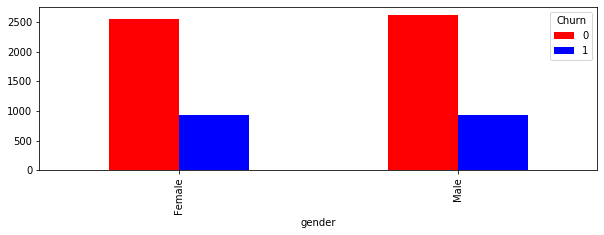

In [267]:
# Visual Inference using Grouped Bar chart
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

In [268]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['SeniorCitizen'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
SeniorCitizen,,
0,4498,1382
1,666,475


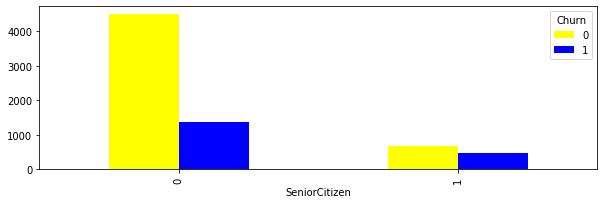

In [269]:
CrossTabResult.plot.bar(figsize=(10,3), color=['yellow','blue'])

In [270]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['Partner'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
Partner,,
No,2431,1188
Yes,2733,669


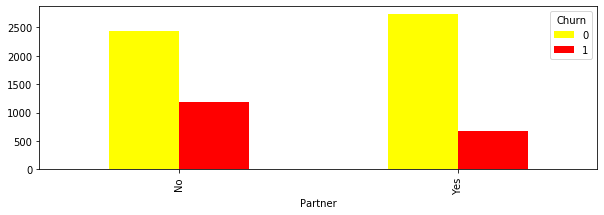

In [271]:
CrossTabResult.plot.bar(figsize=(10,3), color=['yellow','red'])

In [272]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['Dependents'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
Dependents,,
No,3380,1531
Yes,1784,326


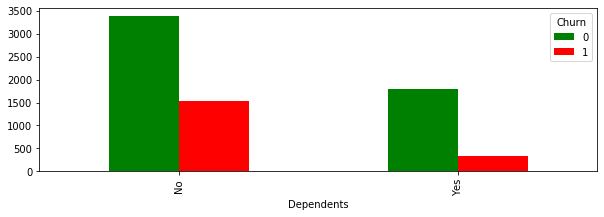

In [273]:
CrossTabResult.plot.bar(figsize=(10,3), color=['green','red'])

In [274]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['PhoneService'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
PhoneService,,
No,512,170
Yes,4652,1687


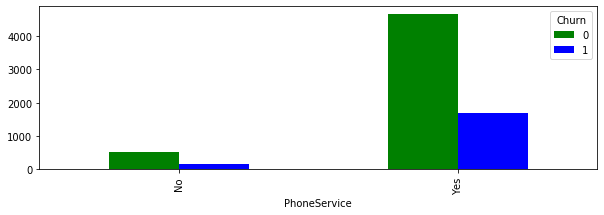

In [275]:
CrossTabResult.plot.bar(figsize=(10,3), color=['green','blue'])

In [276]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['MultipleLines'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
MultipleLines,,
No,2531,837
No phone service,512,170
Yes,2121,850


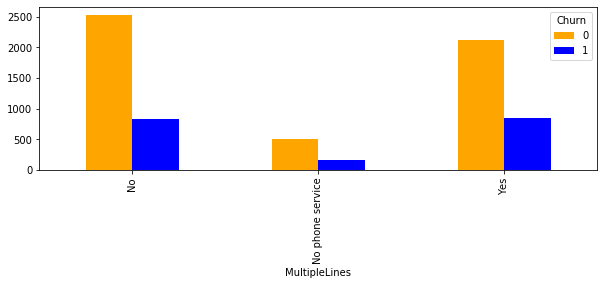

In [277]:
CrossTabResult.plot.bar(figsize=(10,3), color=['orange','blue'])

In [278]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['InternetService'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
InternetService,,
DSL,1962,457
Fiber optic,1799,1291
No,1403,109


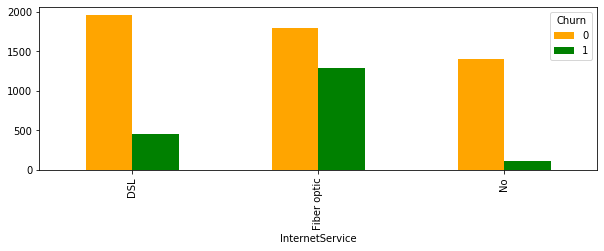

In [279]:
CrossTabResult.plot.bar(figsize=(10,3), color=['orange','green'])

In [280]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['OnlineSecurity'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
OnlineSecurity,,
No,2037,1453
No internet service,1403,109
Yes,1724,295


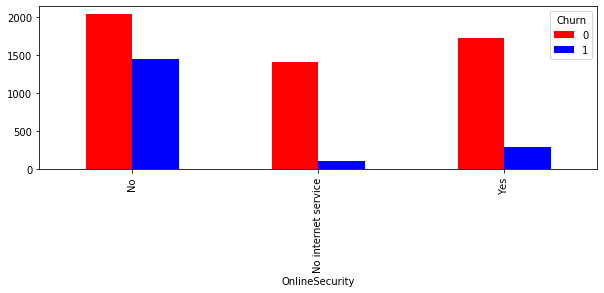

In [281]:
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

In [282]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TCC['OnlineBackup'], columns=TCC['Churn'])
CrossTabResult

Churn,0,1
OnlineBackup,,
No,1855,1225
No internet service,1403,109
Yes,1906,523


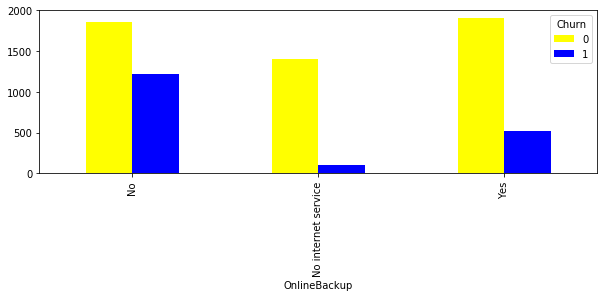

In [283]:
CrossTabResult.plot.bar(figsize=(10,3), color=['yellow','blue'])

## Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [284]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [285]:
# Calling the function
CategoricalVariables=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling']
FunctionChisq(inpData=TCC, TargetVariable='Churn',CategoricalVariablesList= CategoricalVariables)

gender is NOT correlated with Churn | P-Value: 0.4794615390898278
SeniorCitizen is correlated with Churn | P-Value: 8.934159012714662e-37
Partner is correlated with Churn | P-Value: 1.0999615978939857e-35
Dependents is correlated with Churn | P-Value: 1.5995676694071902e-42
PhoneService is NOT correlated with Churn | P-Value: 0.3664940064978196
MultipleLines is correlated with Churn | P-Value: 0.002068559953130916
InternetService is correlated with Churn | P-Value: 1.0857790034735195e-159
OnlineSecurity is correlated with Churn | P-Value: 1.3292265237878154e-184
OnlineBackup is correlated with Churn | P-Value: 8.614898409283198e-131
DeviceProtection is correlated with Churn | P-Value: 1.9555513236078665e-121
TechSupport is correlated with Churn | P-Value: 7.14685771582873e-180
StreamingTV is correlated with Churn | P-Value: 5.469454144000476e-82
StreamingMovies is correlated with Churn | P-Value: 2.750289622934001e-82
Contract is correlated with Churn | P-Value: 6.442284610020534e-257


['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']

In [286]:
# Data Pre Processing
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['PhoneService','TotalCharges']
TCC = TCC.drop(UselessColumns,axis=1)
TCC.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,0
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,0
2,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,1
3,Male,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,0
4,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,1


## Data Pre-processing for Machine Learning

In [287]:
# Finding out how many missing values are present in each column
TCC.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [288]:
TCC.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
Churn                  2
dtype: int64

### Data Pre-Processing: Converting Categorical data to numeric
1. First Treat all Ordinal variables by manually mapping the numeric values
2. Treat all nominal variables using dummy variables

In [289]:
# Treating all the binary nominal variables first
TCC['gender'].replace({'Male':1, 'Female':0}, inplace=True)
TCC['Partner'].replace({'Yes':1, 'No':0}, inplace=True)
TCC['Dependents'].replace({'Yes':1, 'No':0}, inplace=True)
TCC.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,Churn
0,0,0,1,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,0
1,1,0,0,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,0
2,1,0,0,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,1
3,1,0,0,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,0
4,0,0,0,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,1


In [290]:
# Treating all the nominal variables at once using dummy variables
TCCDataNumeric=pd.get_dummies(TCC)
TCCDataNumeric.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
0,0,0,1,0,1,29.85,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,34,56.95,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,0,2,53.85,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,45,42.30,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,2,70.70,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [291]:
# Saving the processed data as a pickle file
TCCDataNumeric.to_pickle('TCCDataNumeric.pkl')

# Machine Learning: Splitting the data into Training and Testing sample

In [292]:
# Printing all the column names for our reference
TCCDataNumeric.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MonthlyCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes'],
      dtype='object')

In [293]:
# Separate Target Variable and Predictor Variables
TargetVariable='Churn'
Predictors=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MonthlyCharges', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes']

X=TCCDataNumeric[Predictors].values
y=TCCDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [294]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)

In [295]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4914, 35)
(4914,)
(2107, 35)
(2107,)


In [296]:
X_train[0:3]

array([[0.        , 0.        , 0.        , 1.        , 0.16666667,
        0.59751244, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ],
       [1.        , 1.        , 1.        , 0.        , 0.72222222,
        0.8641791 , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 1.        , 0.

# Logistic Regression

In [297]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1567
           1       0.63      0.55      0.59       540

    accuracy                           0.80      2107
   macro avg       0.74      0.72      0.73      2107
weighted avg       0.79      0.80      0.80      2107

[[1392  175]
 [ 244  296]]
Accuracy of the model: 0.8


,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,Churn,PredictedChurn
0,1.0,0.0,0.0,0.0,0.388889,0.726368,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,1.0,0.0,1.0,0.0,0.027778,0.017413,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,1.0,0.0,0.0,1.0,0.013889,0.314428,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
3,1.0,1.0,0.0,0.0,0.930556,0.973632,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.0,1.0,0.0,0.0,0.111111,0.814925,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1


In [298]:
# Picking up only the F1Score from the classification report output
# average : string, [None, 'binary' (default), 'micro', 'macro', 'samples','weighted']
print(metrics.f1_score(y_test, prediction, average='weighted'))

0.796494965886221


# Decision Trees

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1567
           1       0.63      0.48      0.54       540

    accuracy                           0.79      2107
   macro avg       0.73      0.69      0.70      2107
weighted avg       0.78      0.79      0.78      2107

[[1413  154]
 [ 282  258]]
Accuracy of the model: 0.78


,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,Churn,PredictedChurn
0,1.0,0.0,0.0,0.0,0.388889,0.726368,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,1.0,0.0,1.0,0.0,0.027778,0.017413,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,1.0,0.0,0.0,1.0,0.013889,0.314428,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
3,1.0,1.0,0.0,0.0,0.930556,0.973632,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.0,1.0,0.0,0.0,0.111111,0.814925,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1


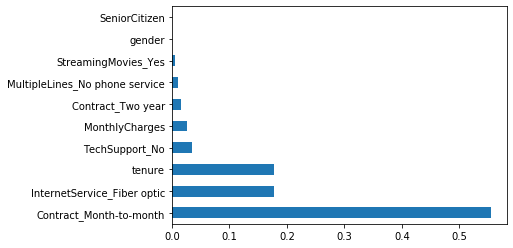

In [299]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting a Decision Tree

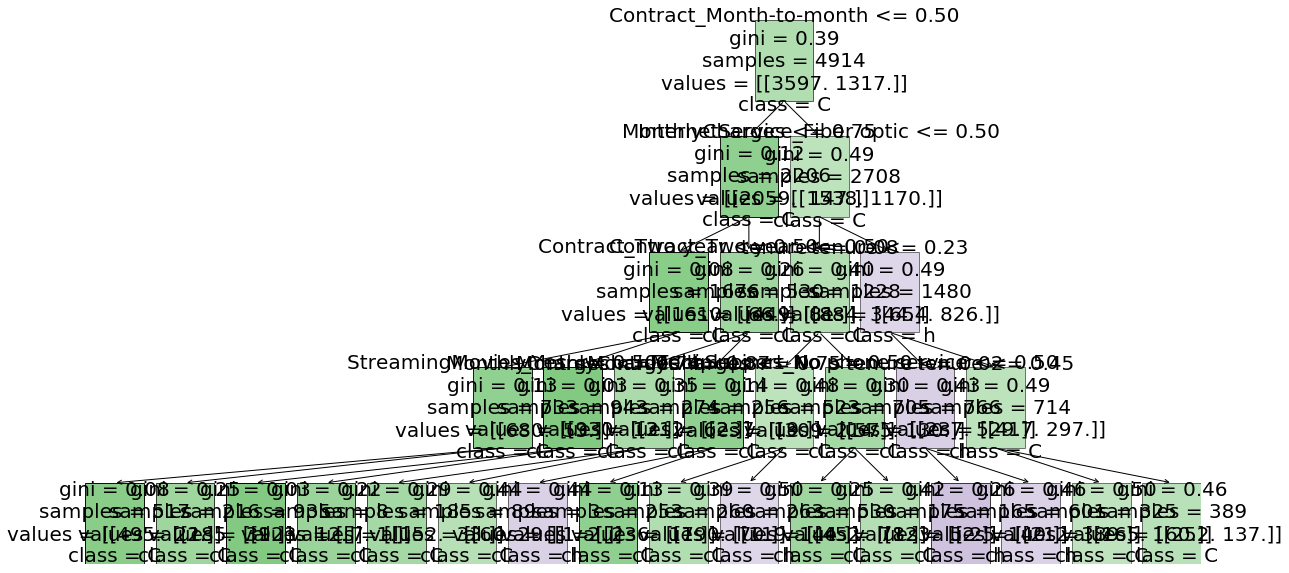

In [300]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
#fig, subplt=plt.subplots(nrows=1,ncols=1, figsize=(10, 10))
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

# Random Forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1567
           1       0.61      0.49      0.54       540

    accuracy                           0.79      2107
   macro avg       0.72      0.69      0.70      2107
weighted avg       0.78      0.79      0.78      2107

[[1395  172]
 [ 276  264]]
Accuracy of the model: 0.78


,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,Churn,PredictedChurn
0,1.0,0.0,0.0,0.0,0.388889,0.726368,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,1.0,0.0,1.0,0.0,0.027778,0.017413,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,1.0,0.0,0.0,1.0,0.013889,0.314428,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
3,1.0,1.0,0.0,0.0,0.930556,0.973632,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.0,1.0,0.0,0.0,0.111111,0.814925,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1


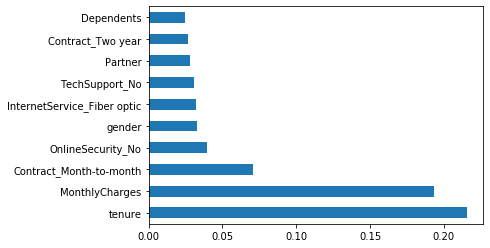

In [301]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=14, n_estimators=500,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting one of the Decision Trees in Random Forest

In [ ]:
# PLotting single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[10], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# AdaBoost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,Churn,PredictedChurn
0,1.0,0.0,0.0,0.0,0.388889,0.726368,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,1.0,0.0,1.0,0.0,0.027778,0.017413,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,1.0,0.0,0.0,1.0,0.013889,0.314428,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
3,1.0,1.0,0.0,0.0,0.930556,0.973632,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.0,1.0,0.0,0.0,0.111111,0.814925,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1


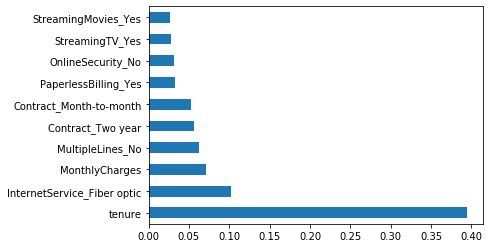

In [311]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=1000, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting one of the Decision trees from Adaboost

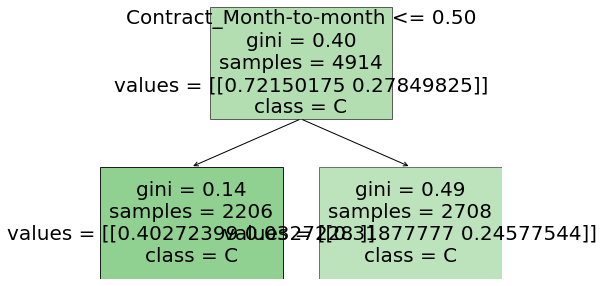

In [312]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1567
           1       0.66      0.54      0.59       540

    accuracy                           0.81      2107
   macro avg       0.75      0.72      0.73      2107
weighted avg       0.80      0.81      0.80      2107

[[1414  15

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,Churn,PredictedChurn
0,1.0,0.0,0.0,0.0,0.388889,0.726368,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,1.0,0.0,1.0,0.0,0.027778,0.017413,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,1.0,0.0,0.0,1.0,0.013889,0.314428,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
3,1.0,1.0,0.0,0.0,0.930556,0.973632,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.0,1.0,0.0,0.0,0.111111,0.814925,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1


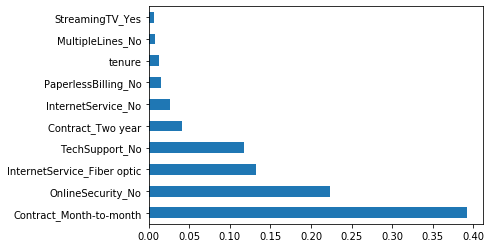

In [319]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=1, learning_rate=0.01, n_estimators=5000, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting a single Decision tree out of XGBoost

In [237]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

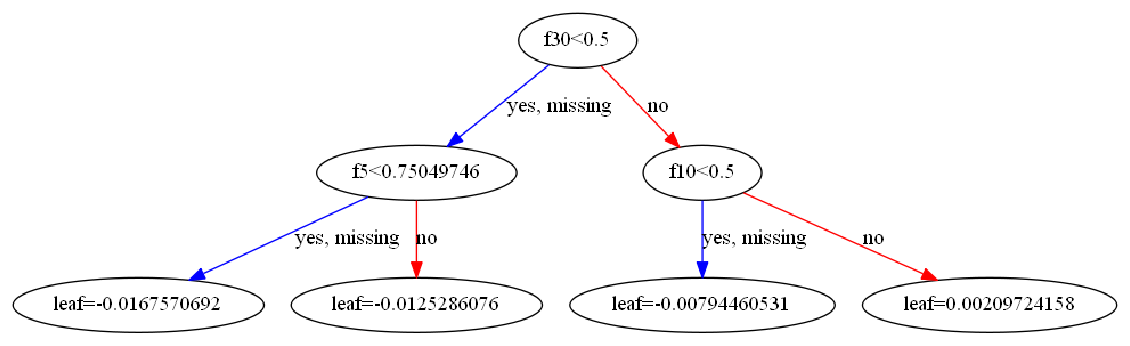

In [238]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# KNN

In [326]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1567
           1       0.55      0.48      0.51       540

    accuracy                           0.76      2107
   macro avg       0.69      0.67      0.68      2107
weighted avg       0.76      0.76      0.76      2107

[[1350  217]
 [ 279  261]]
Accuracy of the model: 0.76


,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,TargetColumn,PredictedChurn
0,1.0,0.0,0.0,0.0,0.388889,0.726368,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,1.0,0.0,1.0,0.0,0.027778,0.017413,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,1.0,0.0,0.0,1.0,0.013889,0.314428,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
3,1.0,1.0,0.0,0.0,0.930556,0.973632,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.0,1.0,0.0,0.0,0.111111,0.814925,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0


# SVM

In [336]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=4, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1567
           1       0.62      0.53      0.57       540

    accuracy                           0.80      2107
   macro avg       0.74      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107

[[1394  173]
 [ 253  287]]
Accuracy of the model: 0.79


,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,TargetColumn,PredictedChurn
0,1.0,0.0,0.0,0.0,0.388889,0.726368,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
1,1.0,0.0,1.0,0.0,0.027778,0.017413,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,1.0,0.0,0.0,1.0,0.013889,0.314428,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
3,1.0,1.0,0.0,0.0,0.930556,0.973632,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.0,1.0,0.0,0.0,0.111111,0.814925,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1


# Naive Bayes

In [337]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1567
           1       0.43      0.84      0.56       540

    accuracy                           0.67      2107
   macro avg       0.67      0.72      0.65      2107
weighted avg       0.79      0.67      0.69      2107

[[956 611]
 [ 87 453]]
Accuracy of the model: 0.69


,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,TargetColumn,PredictedChurn
0,1.0,0.0,0.0,0.0,0.388889,0.726368,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
1,1.0,0.0,1.0,0.0,0.027778,0.017413,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2,1.0,0.0,0.0,1.0,0.013889,0.314428,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
3,1.0,1.0,0.0,0.0,0.930556,0.973632,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.0,1.0,0.0,0.0,0.111111,0.814925,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1


# K-Fold Cross Validation

In [242]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

### LOGISTIC REGRESSION 

In [339]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print(Accuracy_Values)
print('Final Average Accuracy of the model:', Accuracy_Values.mean())

[0.79400718 0.81051173 0.79145618 0.82717545 0.78757203 0.78119644
 0.79961342 0.78807659 0.79495962 0.80086007]
Final Average Accuracy of the model: 0.7975428697361783


### ADABOOST

In [340]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print(Accuracy_Values)
print('Final Average Accuracy of the model:', Accuracy_Values.mean())

[0.79104435 0.79778216 0.78790919 0.80036707 0.78505643 0.769269
 0.79973522 0.77264099 0.77590543 0.80585017]
Final Average Accuracy of the model: 0.7885560014780911


### XGBOOST

In [342]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print(Accuracy_Values)
print('Final Average Accuracy of the model:', Accuracy_Values.mean())

[0.80122043 0.81504632 0.80282295 0.81379965 0.79127095 0.77752351
 0.80820935 0.77636174 0.77690528 0.8151257 ]
Final Average Accuracy of the model: 0.7978285867245345


## CONCLUSION 

The target variable "Churn" is mostly dependent on the predictor variable 'Contract month to month','tenuer','online security','internet service','monthly charges'.
Best algorithm for modeling the given business problem is XGBOOST with accuracy of 80%.